In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

### Distance prediction - Uber

In [2]:
# Read the csv file into a pandas DataFrame
uber_dist = pd.read_csv('uberPricesNew.csv')
uber_dist = uber_dist[["place","dist","time"]]
uber_dist.head()

,place,dist,time
0,Centennial Park,1.37,23:00
1,Centennial Park,1.37,23:00
2,Centennial Park,1.37,23:00
3,Centennial Park,1.37,23:00
4,Centennial Park,1.37,23:00


In [4]:
lyft_dist = pd.read_csv('lyftPricesNew.csv')
lyft_dist= lyft_dist[["place","dist","time"]]
lyft_dist.head()

,place,dist,time
0,Centennial Park,1.71,23:00
1,Centennial Park,1.71,23:00
2,Centennial Park,1.71,23:00
3,Centennial Park,1.71,23:00
4,Centennial Park,1.71,23:00


## Distance Prediction with Linear Regression

In [5]:
uber_dist = pd.get_dummies(uber_dist)

In [6]:
uber_dist.columns

Index(['dist', 'place_Atlanta High Museum', 'place_Bartow',
       'place_Buckhead Bars', 'place_Butts', 'place_Centennial Park',
       'place_Cherokee', 'place_Clayton', 'place_Cobb', 'place_Coweta',
       'place_Dekalb', 'place_Douglas', 'place_Edgewood Bars',
       'place_Emory University', 'place_Fayette', 'place_Forsyth',
       'place_Fox Theater', 'place_Fulton', 'place_Georgia State University',
       'place_Gwinett', 'place_Hall', 'place_Hartsfield Jackson Airport',
       'place_Henry', 'place_Inman Park', 'place_Lenox Square Mall',
       'place_Mercedes Benz Stadium', 'place_Newton', 'place_Paulding',
       'place_Piedmont Park', 'place_Rockdale', 'place_Shops at Buckhead',
       'place_Six Flags', 'place_Spalding', 'place_Spelman College',
       'place_Statefarm Arena', 'place_Stone Mountain', 'place_SunTrust Park',
       'place_Virginia Highlands', 'place_Walton', 'place_Zoo Atlanta',
       'time_00:00', 'time_01:00', 'time_02:00', 'time_03:00', 'time_04:00',
   

In [12]:
Xdu = uber_dist[['place_Atlanta High Museum', 'place_Bartow',
       'place_Buckhead Bars', 'place_Butts', 'place_Centennial Park',
       'place_Cherokee', 'place_Clayton', 'place_Cobb', 'place_Coweta',
       'place_Dekalb', 'place_Douglas', 'place_Edgewood Bars',
       'place_Emory University', 'place_Fayette', 'place_Forsyth',
       'place_Fox Theater', 'place_Fulton', 'place_Georgia State University',
       'place_Gwinett', 'place_Hall', 'place_Hartsfield Jackson Airport',
       'place_Henry', 'place_Inman Park', 'place_Lenox Square Mall',
       'place_Mercedes Benz Stadium', 'place_Newton', 'place_Paulding',
       'place_Piedmont Park', 'place_Rockdale', 'place_Shops at Buckhead',
       'place_Six Flags', 'place_Spalding', 'place_Spelman College',
       'place_Statefarm Arena', 'place_Stone Mountain', 'place_SunTrust Park',
       'place_Virginia Highlands', 'place_Walton', 'place_Zoo Atlanta',
       'time_00:00', 'time_01:00', 'time_02:00', 'time_03:00', 'time_04:00',
       'time_05:00', 'time_06:00', 'time_07:00', 'time_08:00', 'time_09:00',
       'time_10:00', 'time_11:00', 'time_12:00', 'time_13:00', 'time_14:00',
       'time_15:00', 'time_16:00', 'time_17:00', 'time_18:00', 'time_19:00',
       'time_20:00', 'time_21:00', 'time_22:00', 'time_23:00']]

In [13]:
uber_dist.shape

(78390, 64)

In [14]:
ydu = uber_dist["dist"].values.reshape(-1, 1)
print(Xdu.shape, ydu.shape)

(78390, 63) (78390, 1)


In [15]:
lyft_dist = pd.get_dummies(lyft_dist)

In [16]:
lyft_dist.columns

Index(['dist', 'place_Atlanta High Museum', 'place_Bartow',
       'place_Buckhead Bars', 'place_Butts', 'place_Centennial Park',
       'place_Cherokee', 'place_Clayton', 'place_Cobb', 'place_Coweta',
       'place_Dekalb', 'place_Douglas', 'place_Edgewood Bars',
       'place_Emory University', 'place_Fayette', 'place_Forsyth',
       'place_Fox Theater', 'place_Fulton', 'place_Georgia State University',
       'place_Gwinett', 'place_Hall', 'place_Hartsfield Jackson Airport',
       'place_Henry', 'place_Inman Park', 'place_Lenox Square Mall',
       'place_Mercedes Benz Stadium', 'place_Newton', 'place_Paulding',
       'place_Piedmont Park', 'place_Rockdale', 'place_Shops at Buckhead',
       'place_Six Flags', 'place_Spalding', 'place_Spelman College',
       'place_Statefarm Arena', 'place_Stone Mountain', 'place_SunTrust Park',
       'place_Virginia Highlands', 'place_Walton', 'place_Zoo Atlanta',
       'time_00:00', 'time_01:00', 'time_02:00', 'time_03:00', 'time_04:00',
   

In [17]:
Xdl = lyft_dist[['place_Atlanta High Museum', 'place_Bartow',
       'place_Buckhead Bars', 'place_Butts', 'place_Centennial Park',
       'place_Cherokee', 'place_Clayton', 'place_Cobb', 'place_Coweta',
       'place_Dekalb', 'place_Douglas', 'place_Edgewood Bars',
       'place_Emory University', 'place_Fayette', 'place_Forsyth',
       'place_Fox Theater', 'place_Fulton', 'place_Georgia State University',
       'place_Gwinett', 'place_Hall', 'place_Hartsfield Jackson Airport',
       'place_Henry', 'place_Inman Park', 'place_Lenox Square Mall',
       'place_Mercedes Benz Stadium', 'place_Newton', 'place_Paulding',
       'place_Piedmont Park', 'place_Rockdale', 'place_Shops at Buckhead',
       'place_Six Flags', 'place_Spalding', 'place_Spelman College',
       'place_Statefarm Arena', 'place_Stone Mountain', 'place_SunTrust Park',
       'place_Virginia Highlands', 'place_Walton', 'place_Zoo Atlanta',
       'time_00:00', 'time_01:00', 'time_02:00', 'time_03:00', 'time_04:00',
       'time_05:00', 'time_06:00', 'time_07:00', 'time_08:00', 'time_09:00',
       'time_10:00', 'time_11:00', 'time_12:00', 'time_13:00', 'time_14:00',
       'time_15:00', 'time_16:00', 'time_17:00', 'time_18:00', 'time_19:00',
       'time_20:00', 'time_21:00', 'time_22:00', 'time_23:00']]

In [18]:
lyft_dist.shape

(73466, 64)

In [19]:
ydl = lyft_dist["dist"].values.reshape(-1, 1)
print(Xdl.shape, ydl.shape)

(73466, 63) (73466, 1)


### Linear regression Uber

In [20]:
from sklearn.model_selection import train_test_split

Xdu_train, Xdu_test, ydu_train, ydu_test = train_test_split(Xdu, ydu, random_state=42)

In [21]:
from sklearn.linear_model import LinearRegression
modeldu = LinearRegression()
modeldu.fit(Xdu_train, ydu_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [22]:
training_score = modeldu.score(Xdu_train, ydu_train)
testing_score = modeldu.score(Xdu_test, ydu_test)

print(f"Training Score: {training_score}")
print(f"Testing Score: {testing_score}")

Training Score: 0.9968660670564958
Testing Score: 0.9968428254165403


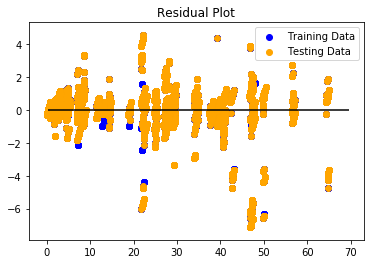

In [23]:
plt.scatter(modeldu.predict(Xdu_train), modeldu.predict(Xdu_train) - ydu_train, c="blue", label="Training Data")
plt.scatter(modeldu.predict(Xdu_test), modeldu.predict(Xdu_test) - ydu_test, c="orange", label="Testing Data")
plt.legend()
plt.hlines(y=0, xmin=ydu_test.min(), xmax=ydu_test.max())
plt.title("Residual Plot")
plt.show()

In [24]:
from sklearn.metrics import mean_squared_error

predictionsdu = modeldu.predict(Xdu_test)
MSEdu = mean_squared_error(ydu_test, predictionsdu)
r2du = modeldu.score(Xdu_test, ydu_test)

print(f"MSE: {MSEdu}, R2: {r2du}")

MSE: 1.1019802370193528, R2: 0.9968428254165403


In [25]:
predictionsdu-ydu_test

array([[-0.55515747],
       [ 0.98563599],
       [ 0.54069824],
       ...,
       [-1.49605347],
       [-0.11980835],
       [ 0.26485352]])

### Linear regression Lyft

In [26]:
from sklearn.model_selection import train_test_split

Xdl_train, Xdl_test, ydl_train, ydl_test = train_test_split(Xdl, ydl, random_state=42)
from sklearn.linear_model import LinearRegression
modeldl = LinearRegression()
modeldl.fit(Xdl_train, ydl_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [27]:
training_score = modeldl.score(Xdl_train, ydl_train)
testing_score = modeldl.score(Xdl_test, ydl_test)

print(f"Training Score: {training_score}")
print(f"Testing Score: {testing_score}")

Training Score: 0.9975648489130104
Testing Score: 0.9975982430315888


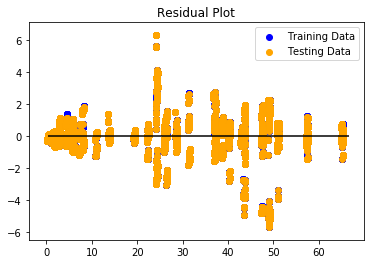

In [28]:
plt.scatter(modeldl.predict(Xdl_train), modeldl.predict(Xdl_train) - ydl_train, c="blue", label="Training Data")
plt.scatter(modeldl.predict(Xdl_test), modeldl.predict(Xdl_test) - ydl_test, c="orange", label="Testing Data")
plt.legend()
plt.hlines(y=0, xmin=ydl_test.min(), xmax=ydl_test.max())
plt.title("Residual Plot")
plt.show()

In [29]:
from sklearn.metrics import mean_squared_error

predictionsdl = modeldl.predict(Xdl_test)
MSEdl = mean_squared_error(ydl_test, predictionsdl)
r2dl = modeldl.score(Xdl_test, ydl_test)

print(f"MSE: {MSEdu}, R2: {r2du}")

MSE: 1.1019802370193528, R2: 0.9968428254165403


### LassoLars

In [24]:
from sklearn.linear_model import LassoLars
reg = LassoLars(alpha=0.01)
reg.fit(Xdu_train, ydu_train)
training_score1 = reg.score(Xdu_train, ydu_train)
testing_score1 = reg.score(Xdu_test, ydu_test)

### END SOLUTION 

print(f"Training Score: {training_score1}")
print(f"Testing Score: {testing_score1}")

Training Score: 0.5392717085021502
Testing Score: 0.5359924891279142


### SVR Regression Uber

### Random Forest Regressor - Uber

In [25]:
from sklearn.ensemble import RandomForestRegressor

regrdu = RandomForestRegressor(max_depth=2, random_state=0, n_estimators=100)
regrdu.fit(Xdu, ydu)
training_score = regrdu.score(Xdu_train, ydu_train)
testing_score = regrdu.score(Xdu_test, ydu_test)

### END SOLUTION 

print(f"Training Score: {training_score}")
print(f"Testing Score: {testing_score}")

C:\Users\Meryem\Anaconda3\envs\PythonKeras\lib\site-packages\ipykernel_launcher.py:4: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  after removing the cwd from sys.path.


Training Score: 0.24702284611940137
Testing Score: 0.2474354905258911


In [ ]:
from sklearn.ensemble import RandomForestRegressor

regr2 = RandomForestRegressor(max_depth=5, random_state=0, n_estimators=200)
regr2.fit(X, y)
training_score3 = regr2.score(X_train, y_train)
testing_score3 = regr2.score(X_test, y_test)

### END SOLUTION 

print(f"Training Score: {training_score3}")
print(f"Testing Score: {testing_score3}")

In [ ]:
from sklearn.ensemble import RandomForestRegressor

regr = RandomForestRegressor(max_depth=7, random_state=0, n_estimators=200)
regr.fit(X, y)
training_score3 = regr.score(X_train, y_train)
testing_score3 = regr.score(X_test, y_test)

### END SOLUTION 

print(f"Training Score: {training_score3}")
print(f"Testing Score: {testing_score3}")

In [28]:
from sklearn.ensemble import RandomForestRegressor

regrdu = RandomForestRegressor(max_depth=11, random_state=0, n_estimators=1000)
regrdu.fit(Xdu, ydu.ravel())
training_score3 = regrdu.score(Xdu_train, ydu_train.ravel())
testing_score3 = regrdu.score(Xdu_test, ydu_test.ravel())

### END SOLUTION 

print(f"Training Score: {training_score3}")
print(f"Testing Score: {testing_score3}")

Training Score: 0.7845013116634844
Testing Score: 0.7769188404079481


In [ ]:
regr.get_params()

In [ ]:
regr.get_params(deep=True)

In [ ]:
regr.decision_path(X_test)

In [ ]:
regr.decision_path(X_train)

In [ ]:
importances = regr.feature_importances_
importances

In [ ]:
# We can sort the features by their importance
sorted(zip(regr.feature_importances_, X.columns), reverse=True)

In [ ]:
plt.scatter(regr.predict(X_train), regr.predict(X_train) - y_train.ravel(), c="blue", label="Training Data")
plt.scatter(regr.predict(X_test), regr.predict(X_test) - y_test.ravel(), c="orange", label="Testing Data")
plt.legend()
plt.hlines(y=0, xmin=y_test.ravel().min(), xmax=y_test.ravel().max())
plt.title("Residual Plot")
plt.show()

In [ ]:
predictionsrf = regr.predict(X_test)
MSE = mean_squared_error(y_test.ravel(), predictionsrf)
r2 = regr.score(X_test, y_test.ravel())

print(f"MSE: {MSE}, R2: {r2}")

In [ ]:
predictionsrf.shape

In [ ]:
y_test

In [ ]:
y_test.ravel().shape

In [ ]:
predictionsrf - y_test.ravel()

In [ ]:
X_test

In [ ]:
pr = regr.predict([[1.32,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0]])
pr

In [ ]:
# df.loc[(df['column_name'] >= A) & (df['column_name'] <= B)]
xpr = uber.loc[(uber["dist"] == 1.32) & (uber["place_Atlanta High Museum"] == 1) &
                (uber["display_name_UberX"] == 1) & (uber["time_07:00"] == 1)]
xpr

In [ ]:
xpr_all = uber_all.loc[(uber_all["dist"] == 1.32) & (uber_all["place"] == "Atlanta High Museum") &
                (uber_all["display_name"] == "UberX") & (uber_all["time"] == "07:00")]
xpr_all

In [ ]:
pd.DataFrame({"Predicted": predictionsrf, "Actual": y_test.ravel(), "Error": predictionsrf - y_test.ravel()})[["Predicted", "Actual", "Error"]]